In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

In [2]:
data=pd.read_csv(r"C:\Users\Venkatesham\Downloads\archive (9)\train_u6lujuX_CVtuZ9i.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.shape

(614, 13)

In [6]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [7]:
data["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [8]:
data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [9]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
list(data["Education"].unique())

['Graduate', 'Not Graduate']

In [11]:
data.duplicated().sum()

0

In [12]:
data["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
len(data)

614

In [14]:
data.isnull().mean()/len(data)*100

Loan_ID              0.000000
Gender               0.003448
Married              0.000796
Dependents           0.003979
Education            0.000000
Self_Employed        0.008488
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.005836
Loan_Amount_Term     0.003714
Credit_History       0.013263
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [15]:
data=data.dropna()

In [16]:
data.groupby('Education')["LoanAmount"].mean()

Education
Graduate        151.728460
Not Graduate    117.123711
Name: LoanAmount, dtype: float64

In [17]:
l=list(data.groupby('Education')["LoanAmount"].mean().values)

In [18]:
l

[151.7284595300261, 117.12371134020619]

#### There are some missing values

<AxesSubplot:>

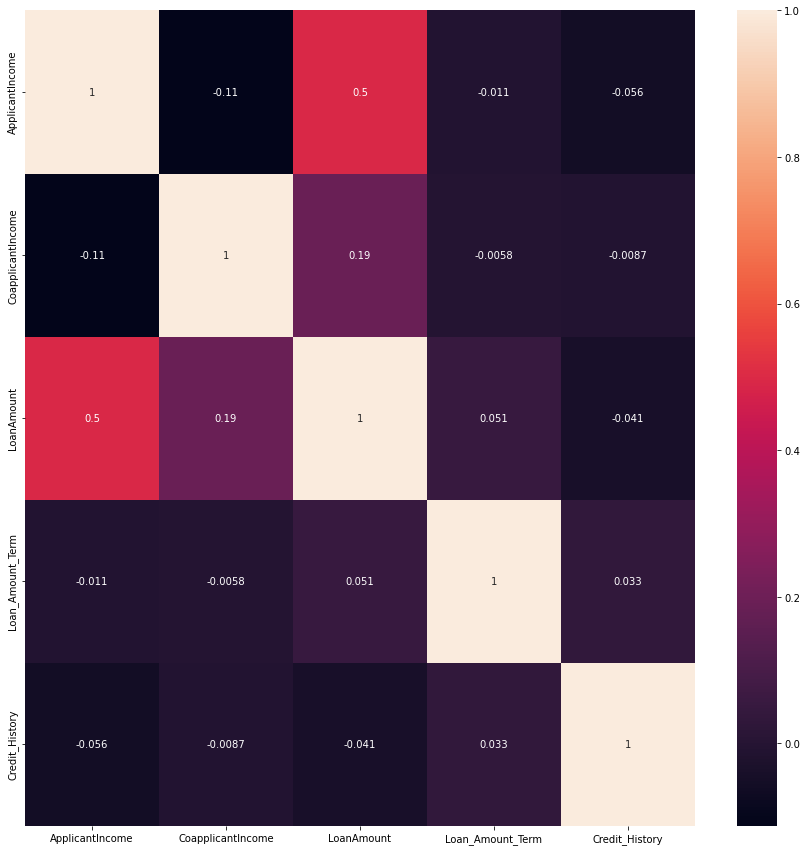

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

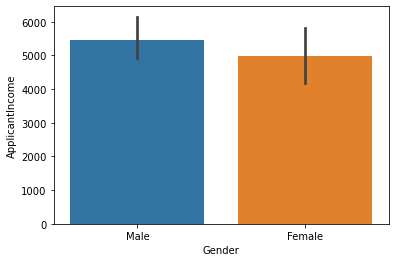

In [20]:
sns.barplot(x="Gender",y="ApplicantIncome",data=data)
plt.show()

#### Males have more income than Females

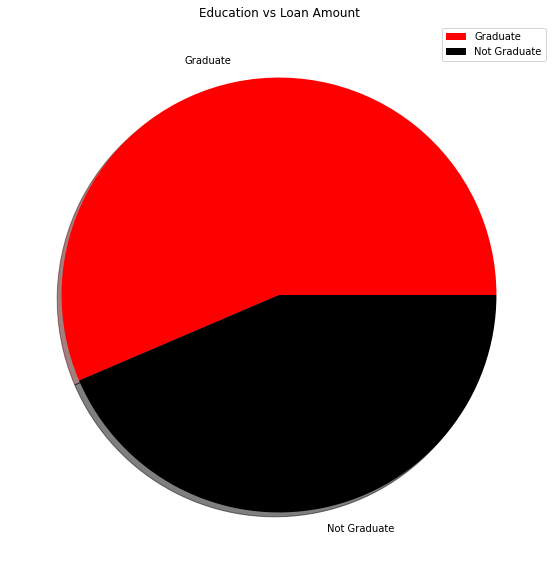

In [21]:
plt.figure(figsize=(10,10))
loan = l
plt.pie(l,labels=list(data["Education"].unique()),colors = ['red','black'],shadow=True)
plt.legend()
plt.title("Education vs Loan Amount")
plt.show()

In [22]:
### Average Loan amount taken by Graduates is more then non-graduates

C:\Users\Venkatesham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome'>

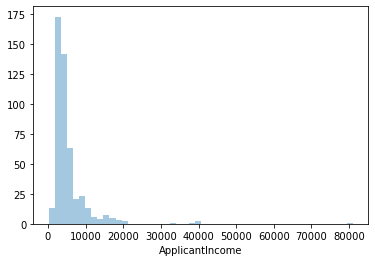

In [23]:
sns.distplot(data["ApplicantIncome"],kde=False)

<AxesSubplot:xlabel='LoanAmount'>

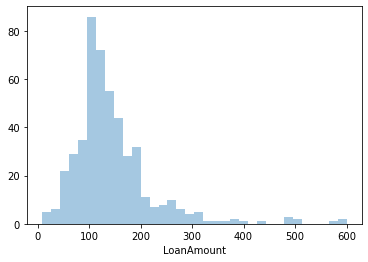

In [24]:
sns.distplot(data["LoanAmount"],kde=False)

In [25]:
data.groupby('Property_Area')["LoanAmount"].mean()

Property_Area
Rural        155.640288
Semiurban    146.057592
Urban        132.946667
Name: LoanAmount, dtype: float64

In [26]:
l=list(data.groupby('Property_Area')["LoanAmount"].mean().values)

In [27]:
l

[155.64028776978418, 146.05759162303664, 132.94666666666666]

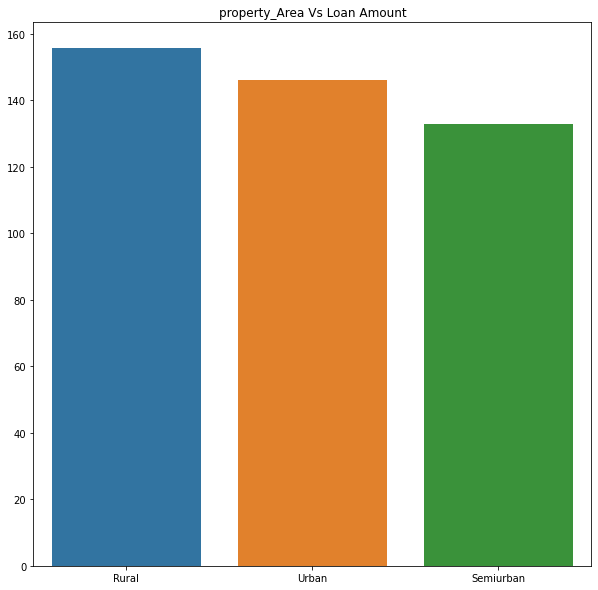

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(x=data["Property_Area"].unique(),y=l)
plt.title("property_Area Vs Loan Amount")
plt.show()

In [29]:
### Loans are given more to the people who are having properties in urban areas compared to the properties in rural and semiurban

<AxesSubplot:xlabel='Married', ylabel='count'>

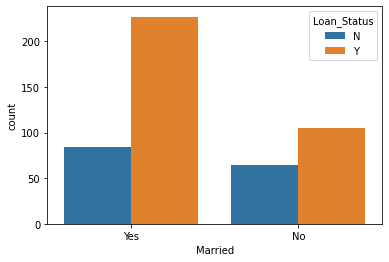

In [30]:
sns.countplot(x = 'Married', hue = 'Loan_Status',data = data)

In [31]:
#### People who got married are more eligible to take loan

<AxesSubplot:xlabel='Education', ylabel='count'>

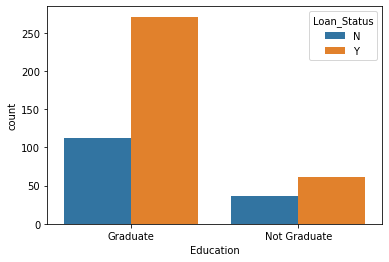

In [32]:
sns.countplot(x = 'Education', hue = 'Loan_Status',data = data)

#### Graduates have more chances to be eligible for receiving Loan 

In [33]:
obj = data.select_dtypes('object').columns
obj

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
# converting obj to num data type

In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
oe = OrdinalEncoder()

In [37]:
data[obj] = data[obj].astype(str)
data[obj] = oe.fit_transform(data[obj])

In [38]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,2.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,3.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,4.0,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0


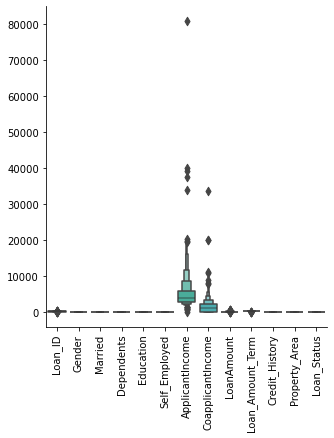

In [39]:
sns.catplot(data=data,kind = 'boxen')
plt.xticks(rotation=90)
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler 

In [41]:
ss = StandardScaler()
data.iloc[:,:-1] = ss.fit_transform(data.iloc[:,:-1])

In [42]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,-1.728446,0.467198,0.737162,0.218599,-0.503253,-0.399275,-0.137970,-0.027952,-0.208089,0.275542,0.413197,-1.318868,0.0
2,-1.721229,0.467198,0.737162,-0.762033,-0.503253,2.504541,-0.417536,-0.604633,-0.979001,0.275542,0.413197,1.259774,1.0
3,-1.714012,0.467198,0.737162,-0.762033,1.987072,-0.399275,-0.491180,0.297100,-0.307562,0.275542,0.413197,1.259774,1.0
4,-1.706795,0.467198,-1.356553,-0.762033,-0.503253,-0.399275,0.112280,-0.604633,-0.046446,0.275542,0.413197,1.259774,1.0
5,-1.699579,0.467198,0.737162,1.199231,-0.503253,2.504541,0.009319,0.999978,1.520245,0.275542,0.413197,1.259774,1.0


In [43]:
# splitting data

In [44]:
c_l = data[['Gender', 'Married', 'Education','ApplicantIncome', 'LoanAmount', 'Credit_History']]
t_v = data[['Loan_Status']]

In [45]:
c_l.head()

,Gender,Married,Education,ApplicantIncome,LoanAmount,Credit_History
1,0.467198,0.737162,-0.503253,-0.137970,-0.208089,0.413197
2,0.467198,0.737162,-0.503253,-0.417536,-0.979001,0.413197
3,0.467198,0.737162,1.987072,-0.491180,-0.307562,0.413197
4,0.467198,-1.356553,-0.503253,0.112280,-0.046446,0.413197
5,0.467198,0.737162,-0.503253,0.009319,1.520245,0.413197


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(c_l,t_v, test_size=0.2, random_state=10)

In [48]:
# def mm(model):
#     model.fit(x_train,y_train)
#     ypred = model.predict(x_test)
#     train_accuracy = model.score(x_train,y_train)
#     test_accuracy = model.score(x_test,y_test)
#     print(str(model)[:-2],'Accuracy')
#     print('Accuracy:',accuracy_score(y_test,ypred), '\nConfusion matrix: \n',confusion_matrix(y_test,ypred))
#     print(f'Training Accuracy:{train_accuracy}\nTesting accuracy:{test_accuracy}')
#     print()
#     print()
#     return model

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 

In [50]:
model = RandomForestClassifier( max_depth = 4,random_state=10)
model.fit(x_train,y_train)

C:\Users\Venkatesham\AppData\Local\Temp\ipykernel_5800\2246369155.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier(max_depth=4, random_state=10)

In [51]:
predi = model.predict(x_train)
accuracy_score(y_train,predi) 

0.8177083333333334

In [55]:
import joblib

In [56]:
joblib.dump(model,r"C:\Users\Venkatesham\Desktop\internship_2023\loan_prediction\model.joblib")

['C:\\Users\\Venkatesham\\Desktop\\internship_2023\\loan_prediction\\model.joblib']